<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практика" data-toc-modified-id="Практика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практика</a></span><ul class="toc-item"><li><span><a href="#ЦПТ-для-различных-распределений" data-toc-modified-id="ЦПТ-для-различных-распределений-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ЦПТ для различных распределений</a></span><ul class="toc-item"><li><span><a href="#Сгенерируйте-примеры-из-распределения" data-toc-modified-id="Сгенерируйте-примеры-из-распределения-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Сгенерируйте примеры из распределения</a></span></li><li><span><a href="#Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения" data-toc-modified-id="Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Постройте гистограмму выборки и теоретическую плотность распределения</a></span></li><li><span><a href="#Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок" data-toc-modified-id="Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Оценим распределение выборочного среднего для разных объёмов выборок</a></span></li></ul></li><li><span><a href="#Доверительный-интервал-на-основе-ЦПТ" data-toc-modified-id="Доверительный-интервал-на-основе-ЦПТ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Доверительный интервал на основе ЦПТ</a></span></li></ul></li></ul></div>

# Практика

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import _zconfint_generic as zc
%matplotlib inline


import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [67]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
logistic = sts.logistic()
sample = logistic.rvs(100)
sample

array([-4.59856256e-01,  5.11494263e-01, -3.19784315e-02, -2.31852700e+00,
       -1.27916433e+00, -2.82405914e+00,  4.39456437e-01,  1.18251048e+00,
        7.04968873e-02, -1.55019162e-01,  1.21348026e+00,  1.06027020e+00,
       -3.15994916e+00, -5.65642173e+00,  2.05896620e+00,  2.00488648e+00,
        8.55580373e-01,  4.42229735e+00, -1.12834532e+00, -1.16634113e+00,
       -5.21233255e-02,  1.94762643e-01, -8.33296018e-01,  1.35371848e-01,
       -4.47958327e-02, -1.08099348e+00,  6.46030992e-01, -2.46569308e+00,
        4.80553833e-03,  6.19404106e-01, -3.38407590e+00, -8.48445436e-01,
       -1.80337382e-01,  1.35005733e-01,  3.47852132e-01, -8.25734449e-01,
       -1.32035242e+00, -1.01072221e+00, -3.13562350e+00, -9.17427910e-01,
        1.35924946e+00,  1.76290480e+00,  1.07044127e+00, -1.46546135e+00,
        1.00998170e-01,  1.90631382e+00, -1.95607748e+00, -7.10864543e-01,
        1.57961763e-01,  1.43858740e+00,  5.29634748e-01,  3.33955522e-01,
        1.55371529e+00, -

In [52]:
sample.dtype

dtype('float64')

In [53]:
real_mean = logistic.mean() # настоящее среднее случайной величины

In [54]:
real_var = logistic.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

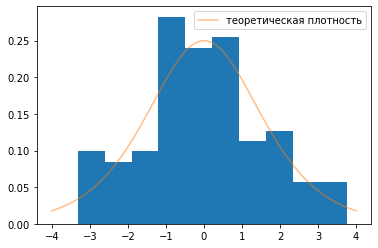

In [56]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = logistic.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [68]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean, real_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var, real_var)

-0.1949622497121929 0.0
2.813906378396086 3.289868133696453


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

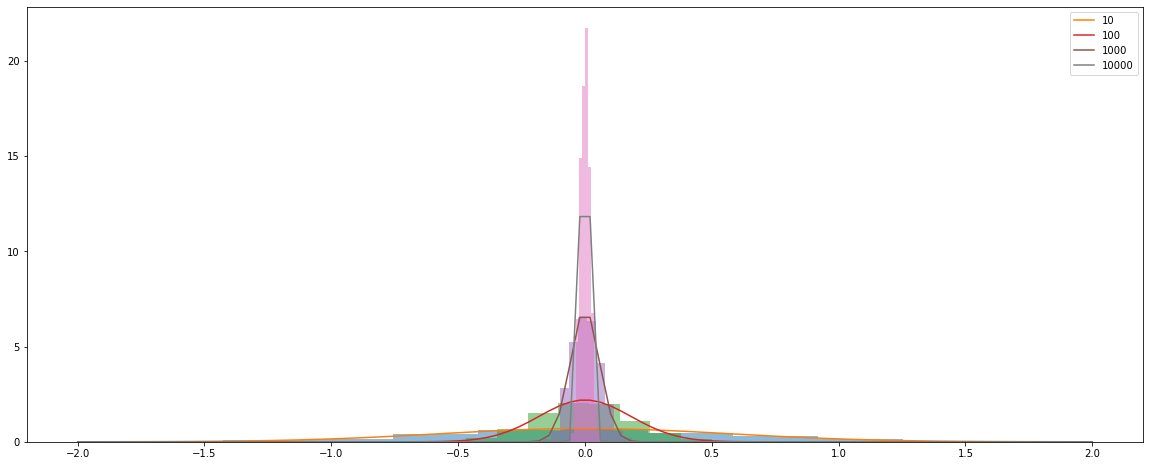

In [69]:
# ваш код тут
plt.figure(figsize=(20,8))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(logistic.rvs(N)))
    plt.hist(means, alpha=0.5, density = True)
    norm_log = sts.norm(loc=logistic.mean(), scale=logistic.std() / np.sqrt(N))
    x = np.linspace(-2,2,100)
    plt.plot(x, norm_log.pdf(x))

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Да, для выбранного распределения апроксимация работает хорошо, графики очень близки к гистограммам как при маленьком объеме выборки, так и при большом.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [70]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


[]

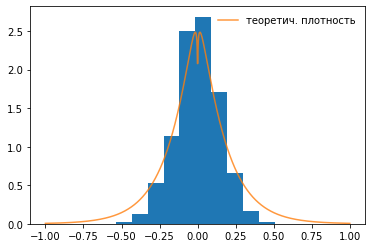

In [44]:
# распределение dgamma: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dgamma.html#scipy.stats.dgamma
a = 1.1
dgamma_rv = sts.dgamma(a)
# Generate random numbers
dgamma_sample = dgamma_rv.rvs(1000)
# dgamma_sample
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(dgamma_rv.rvs(N)))

means = np.array(means).astype(np.float32)
real_dgamma_rv = sts.dgamma(a, loc=dgamma_rv.mean(), scale=dgamma_rv.std() / np.sqrt(N))
plt.hist(means, density=True,) # bins=40)
x = np.linspace(-1,1, 1000)
pdf = real_dgamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретич. плотность', alpha=0.8)
plt.legend(loc='upper right', frameon=False)
plt.plot()

In [100]:
# ваш код тут
true_churn_calls = df.query('churn == True')['total day calls']
print("Доверительный интервал при интервальной оценке для количества звонков ушедших клиентов: {} ".format(
    sts.norm.interval(
        alpha=0.95, loc=np.mean(true_churn_calls), 
        scale=np.std(true_churn_calls, ddof=1)/np.sqrt(true_churn_calls.shape[0])
    )))
print("Доверительный интервал для количества звонков ушедших клиентов методом _zconfint_generic: {} ".format(
    zc(np.mean(true_churn_calls),  np.std(true_churn_calls, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал при интервальной оценке для количества звонков ушедших клиентов: (99.41066229112079, 103.26014516229537) 
Доверительный интервал для количества звонков ушедших клиентов методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [103]:
true_churn_calls.shape[0]

2850

In [102]:
true_churn_calls = df.query('churn == False')['total day calls']
print("Доверительный интервал при интервальной оценке для количества звонков ушедших клиентов: {} ".format(
    sts.norm.interval(
        alpha=0.95, loc=np.mean(true_churn_calls), 
        scale=np.std(true_churn_calls, ddof=1)/np.sqrt(true_churn_calls.shape[0])
    )))
print("Доверительный интервал для количества звонков ушедших клиентов методом _zconfint_generic: {} ".format(
    zc(np.mean(true_churn_calls),  np.std(true_churn_calls, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал при интервальной оценке для количества звонков ушедших клиентов: (99.55618833318324, 101.01012745629045) 
Доверительный интервал для количества звонков ушедших клиентов методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


В первом случае (ушедшие клиенты) доверительный интервал при интервальной оценке больше, а при оценке методом _zconfint_generic меньше.
Во втором случае ситуация обратная, доверительный интервал меньше для интервальной оценки.
Это может быть объяснено количеством доступных данных (483 строки в первом случае и 2850 во втором)